In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set plotting style
sns.set_theme()  # This sets both the style and palette
plt.style.use('default')  # Use default matplotlib style as base

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


In [24]:
# Load the dataset
df = pd.read_csv('../data/raw/raw_analyst_ratings.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Display first few rows
print("\nFirst few rows of the dataset:")
display(df.head())


Dataset Shape: (1407328, 6)

Columns: ['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock']

Data Types:
 Unnamed: 0     int64
headline      object
url           object
publisher     object
date          object
stock         object
dtype: object

Missing Values:
 Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

First few rows of the dataset:


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


Headline Statistics:
       headline_length    word_count
count     1.407328e+06  1.407328e+06
mean      7.312051e+01  1.141671e+01
std       4.073531e+01  6.352997e+00
min       3.000000e+00  1.000000e+00
25%       4.700000e+01  7.000000e+00
50%       6.400000e+01  1.000000e+01
75%       8.700000e+01  1.300000e+01
max       5.120000e+02  7.700000e+01


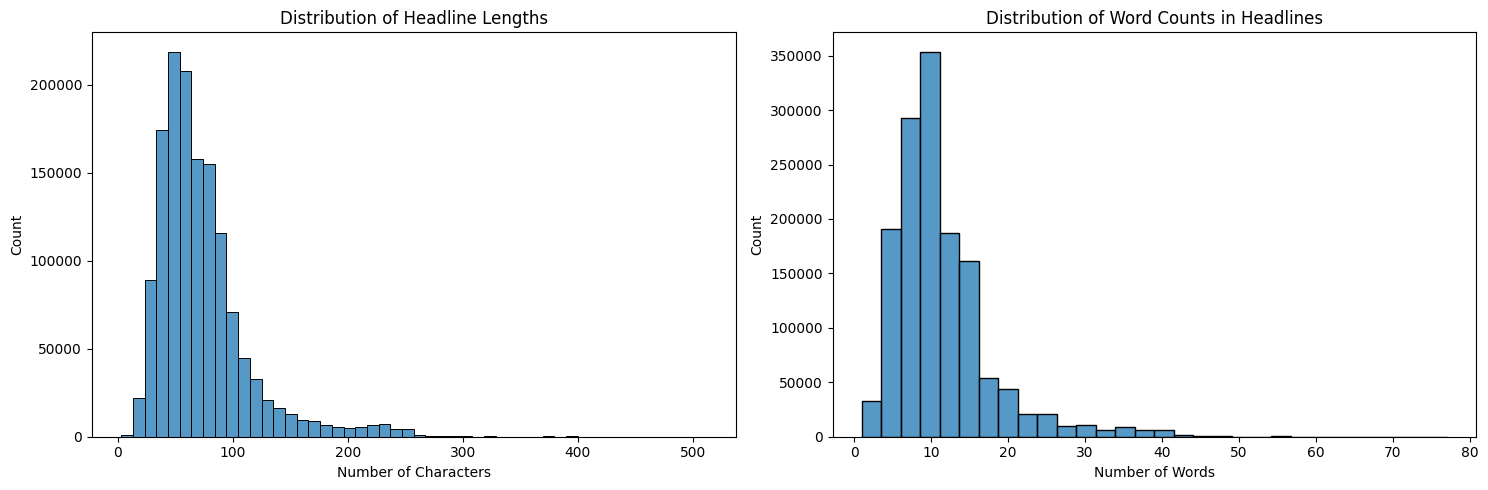


Example Headlines:

Shortest Headlines:


,headline,headline_length,word_count
530954,SPY,3,1
530955,SRS,3,1
602684,J.P,3,1



Longest Headlines:


,headline,headline_length,word_count
701748,JinkoSolar Tiger Pro Series Receives World's F...,512,77
238137,Check Point® Software Technologies Ltd. (NASDA...,509,68
39028,Shares of several financial services companies...,458,70


In [25]:
# Calculate headline statistics
df['headline_length'] = df['headline'].str.len()
df['word_count'] = df['headline'].str.split().str.len()

# Display summary statistics
print("Headline Statistics:")
print(df[['headline_length', 'word_count']].describe())

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot headline length distribution
sns.histplot(data=df, x='headline_length', bins=50, ax=ax1)
ax1.set_title('Distribution of Headline Lengths')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')

# Plot word count distribution
sns.histplot(data=df, x='word_count', bins=30, ax=ax2)
ax2.set_title('Distribution of Word Counts in Headlines')
ax2.set_xlabel('Number of Words')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Display some example headlines of different lengths
print("\nExample Headlines:")
print("\nShortest Headlines:")
display(df.nsmallest(3, 'headline_length')[['headline', 'headline_length', 'word_count']])
print("\nLongest Headlines:")
display(df.nlargest(3, 'headline_length')[['headline', 'headline_length', 'word_count']])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mikiyasegaye/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mikiyasegaye/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mikiyasegaye/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


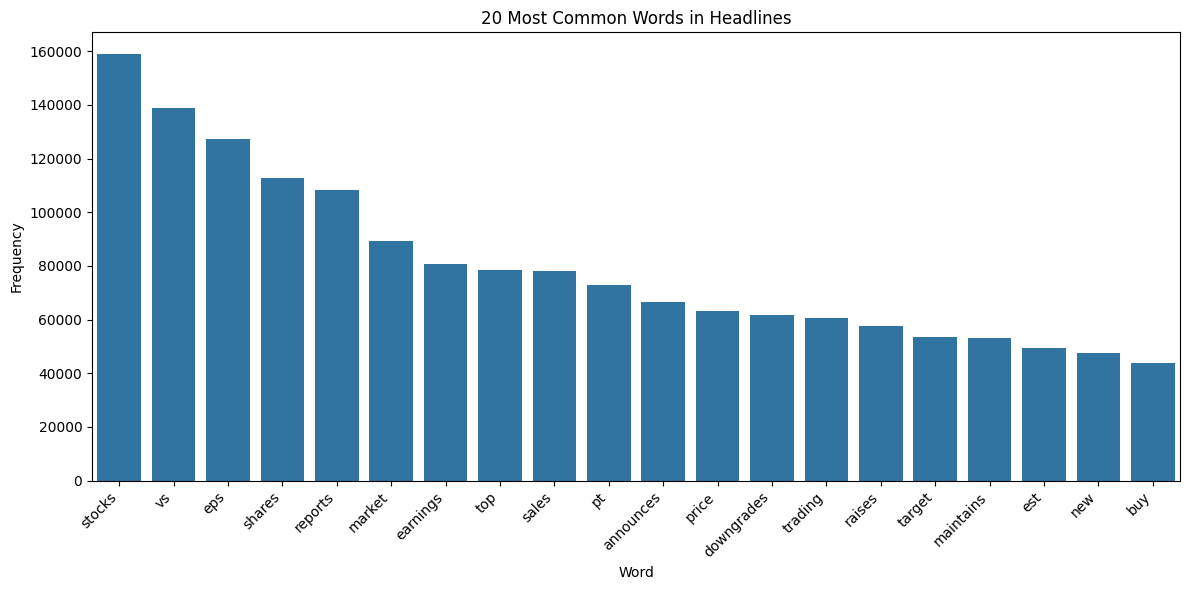


Most Common Words:


,Word,Frequency
0,stocks,159102
1,vs,138801
2,eps,127403
3,shares,112655
4,reports,108429
5,market,89225
6,earnings,80855
7,top,78354
8,sales,77924
9,pt,72733


In [26]:
# Import required libraries for text processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Download all required NLTK data
print("Downloading required NLTK data...")
nltk.download(['punkt', 'stopwords', 'averaged_perceptron_tagger'])

# Function to process text
def process_text(text):
    try:
        # Convert to string if not already
        text = str(text)
        # Tokenize
        tokens = text.lower().split()  # Using simple split instead of word_tokenize for robustness
        # Remove stopwords and punctuation
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return tokens
    except Exception as e:
        print(f"Error processing text: {e}")
        return []

# Process all headlines
all_tokens = []
for headline in df['headline']:
    all_tokens.extend(process_text(headline))

# Get most common words
word_freq = Counter(all_tokens)
most_common_words = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])

# Plot most common words
plt.figure(figsize=(12, 6))
sns.barplot(data=most_common_words, x='Word', y='Frequency')
plt.title('20 Most Common Words in Headlines')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display the most common words
print("\nMost Common Words:")
display(most_common_words)


Data type of date column: object

Sample dates from the dataset:
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object

Unique date formats (first 5):
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object

Error in default parsing: time data "2020-05-22 00:00:00" doesn't match format "%Y-%m-%d %H:%M:%S%z", at position 10. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Converted dates with 'coerce' option:
0   2020-06-05 10:30:54-04:00
1   2020

/var/folders/9c/z436vv391wd5csdhpxszxk600000gn/T/ipykernel_80321/3041095809.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


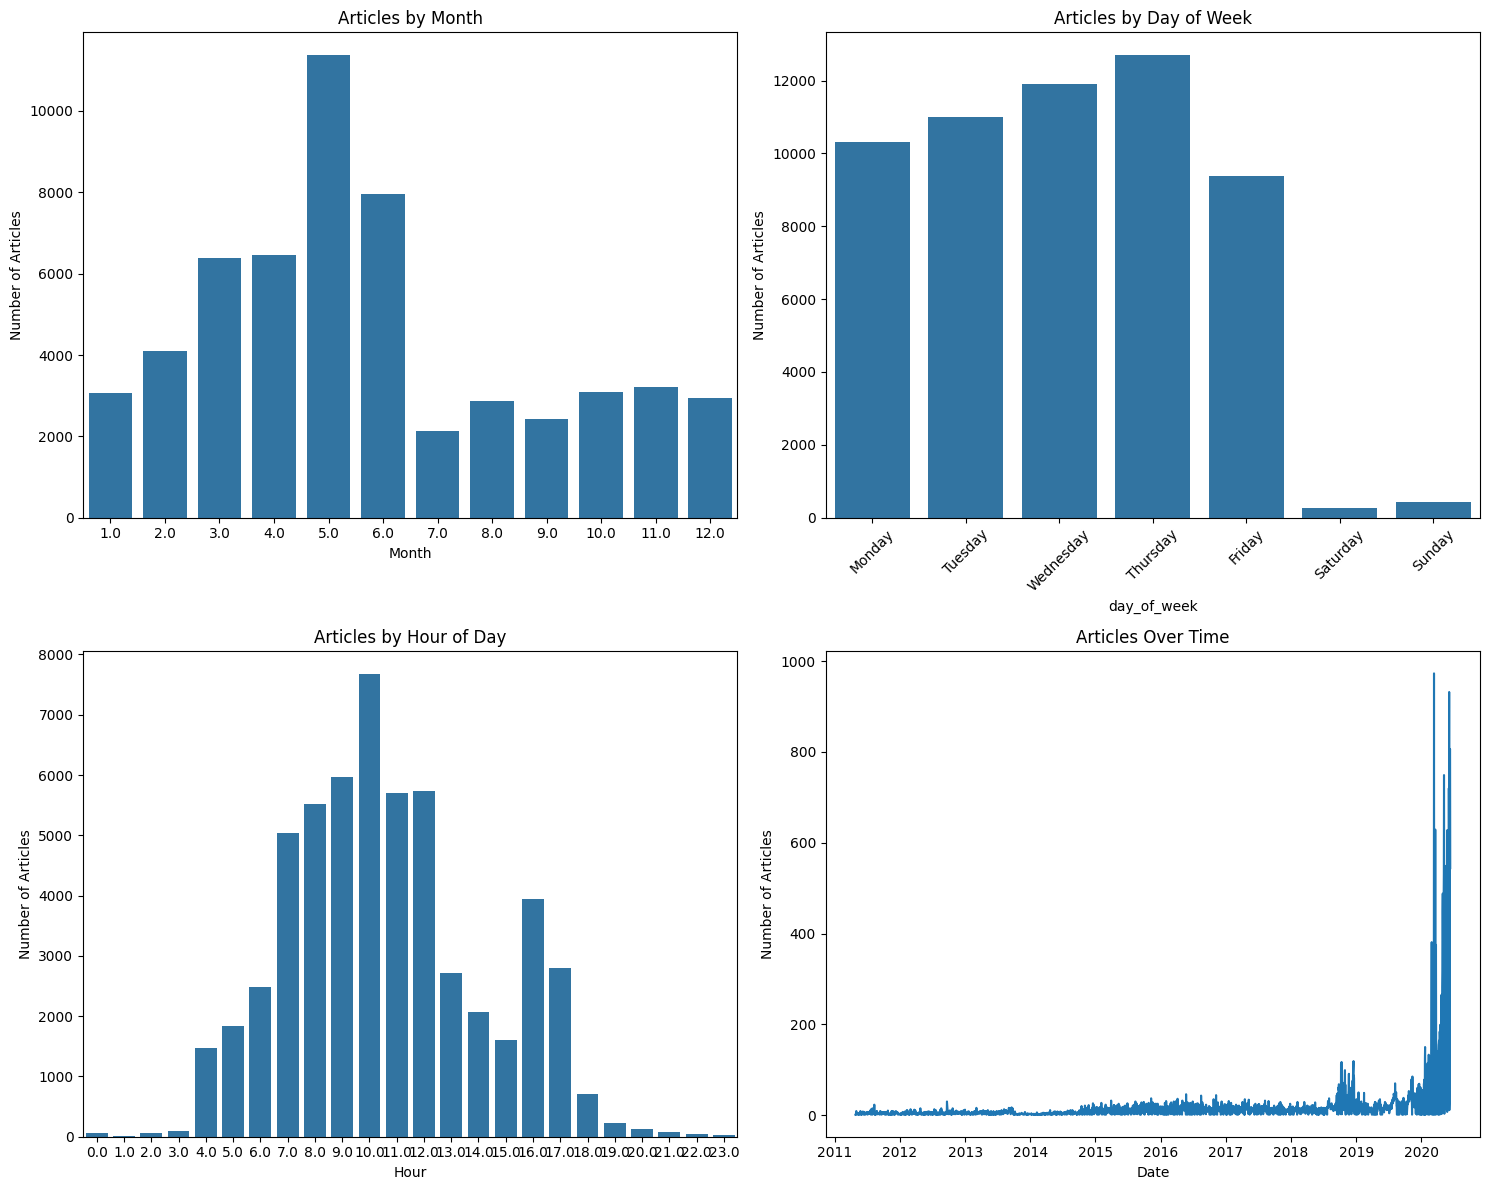


Temporal Distribution Summary:

Top 5 Most Active Days:


date
2020-03-12    973
2020-06-05    932
2020-06-10    806
2020-06-09    804
2020-06-08    765
dtype: int64


Average Articles per:
Day: 22.15
Week Day: 7998.14
Hour: 2332.79


In [27]:
# Let's examine our date data
print("Data type of date column:", df['date'].dtype)
print("\nSample dates from the dataset:")
print(df['date'].head())
print("\nUnique date formats (first 5):")
print(df['date'].drop_duplicates().head())

# Try converting with error handling
try:
    # First attempt with default parser
    df['date'] = pd.to_datetime(df['date'])
except Exception as e:
    print("\nError in default parsing:", str(e))
    try:
        # Second attempt with coerce option to handle errors
        df['date'] = pd.to_datetime(df['date'], errors='coerce')
        print("\nConverted dates with 'coerce' option:")
        print(df['date'].head())

        # Check for any NaT (Not a Time) values
        nat_count = df['date'].isna().sum()
        if nat_count > 0:
            print(f"\nWarning: {nat_count} dates could not be parsed")
    except Exception as e:
        print("\nError in coerced parsing:", str(e))

print("\nFinal data type of date column:", df['date'].dtype)

# Extract various time components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.day_name()
df['hour'] = df['date'].dt.hour

# Create subplots for different temporal patterns
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Articles by month
monthly_counts = df['month'].value_counts().sort_index()
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, ax=ax1)
ax1.set_title('Articles by Month')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Articles')

# 2. Articles by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts = df['day_of_week'].value_counts()
daily_counts = daily_counts.reindex(day_order)
sns.barplot(x=daily_counts.index, y=daily_counts.values, ax=ax2)
ax2.set_title('Articles by Day of Week')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.set_ylabel('Number of Articles')

# 3. Articles by hour
hourly_counts = df['hour'].value_counts().sort_index()
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, ax=ax3)
ax3.set_title('Articles by Hour of Day')
ax3.set_xlabel('Hour')
ax3.set_ylabel('Number of Articles')

# 4. Articles over time (daily)
daily_articles = df.groupby(df['date'].dt.date).size()
daily_articles.plot(ax=ax4)
ax4.set_title('Articles Over Time')
ax4.set_xlabel('Date')
ax4.set_ylabel('Number of Articles')

plt.tight_layout()
plt.show()

# Display summary statistics
print("\nTemporal Distribution Summary:")
print("\nTop 5 Most Active Days:")
display(daily_articles.nlargest(5))

print("\nAverage Articles per:")
print(f"Day: {daily_articles.mean():.2f}")
print(f"Week Day: {daily_counts.mean():.2f}")
print(f"Hour: {hourly_counts.mean():.2f}")


Publisher Statistics:
Total number of unique publishers: 1034
Average articles per publisher: 1361.05
Median articles per publisher: 11.00


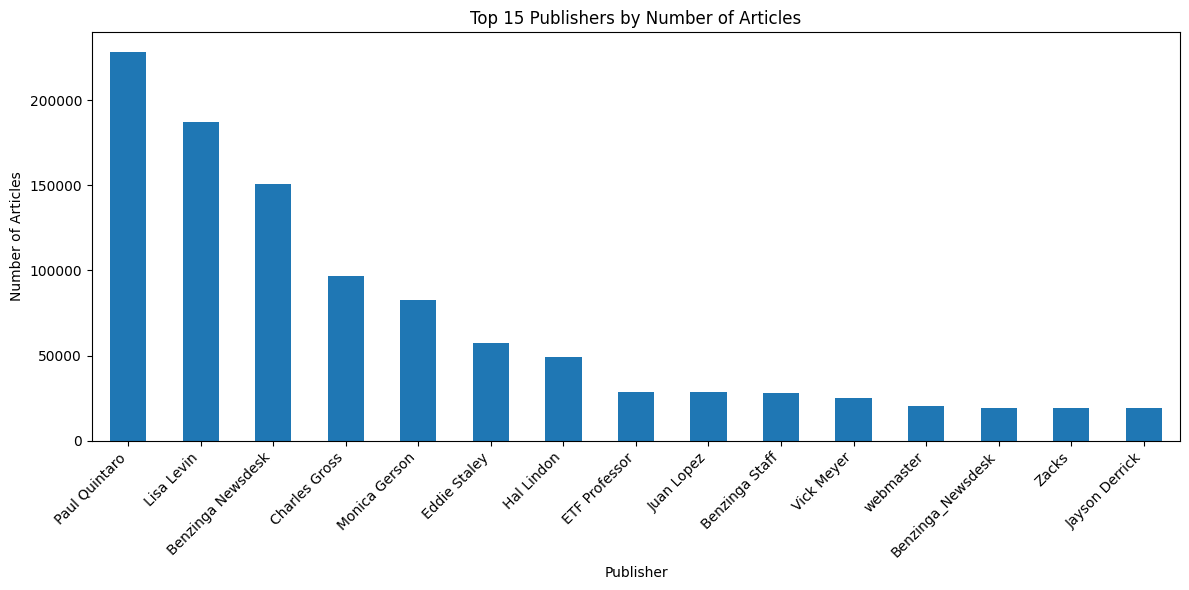


Top 15 Publishers:


,Publisher,Number of Articles,Percentage of Total
0,Paul Quintaro,228373,16.23
1,Lisa Levin,186979,13.29
2,Benzinga Newsdesk,150484,10.69
3,Charles Gross,96732,6.87
4,Monica Gerson,82380,5.85
5,Eddie Staley,57254,4.07
6,Hal Lindon,49047,3.49
7,ETF Professor,28489,2.02
8,Juan Lopez,28438,2.02
9,Benzinga Staff,28114,2.00


In [28]:
# Analyze publishers
publisher_counts = df['publisher'].value_counts()

# Display basic publisher statistics
print("Publisher Statistics:")
print(f"Total number of unique publishers: {len(publisher_counts)}")
print(f"Average articles per publisher: {publisher_counts.mean():.2f}")
print(f"Median articles per publisher: {publisher_counts.median():.2f}")

# Plot top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(15).plot(kind='bar')
plt.title('Top 15 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display top publishers and their article counts
print("\nTop 15 Publishers:")
display(pd.DataFrame({
    'Publisher': publisher_counts.head(15).index,
    'Number of Articles': publisher_counts.head(15).values,
    'Percentage of Total': (publisher_counts.head(15).values / len(df) * 100).round(2)
}))


Stock Statistics:
Total number of unique stocks: 6204
Average articles per stock: 226.84
Median articles per stock: 109.00


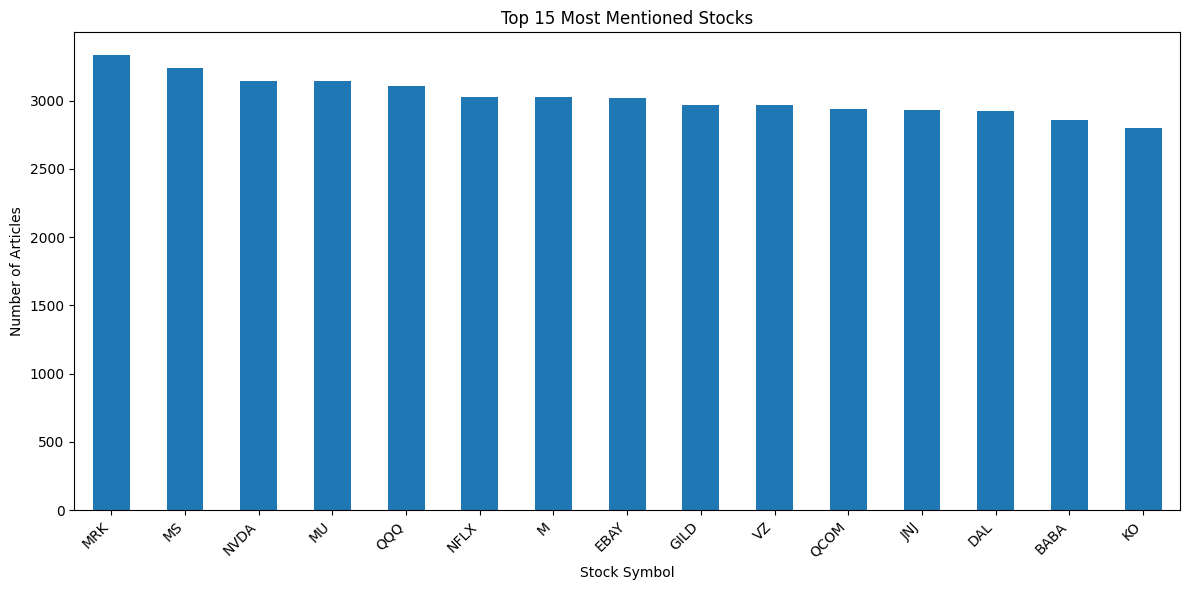


Top 15 Most Covered Stocks:


,Stock Symbol,Number of Articles,Percentage of Total
0,MRK,3333,0.24
1,MS,3238,0.23
2,NVDA,3146,0.22
3,MU,3142,0.22
4,QQQ,3106,0.22
5,NFLX,3028,0.22
6,M,3025,0.21
7,EBAY,3018,0.21
8,GILD,2968,0.21
9,VZ,2966,0.21



Coverage Distribution:
Number of stocks with:
1+ articles: 6204 stocks (100.00%)
5+ articles: 5586 stocks (90.04%)
10+ articles: 5218 stocks (84.11%)
50+ articles: 4152 stocks (66.92%)
100+ articles: 3242 stocks (52.26%)


In [29]:
# Analyze stock symbols
stock_counts = df['stock'].value_counts()

# Display basic stock statistics
print("Stock Statistics:")
print(f"Total number of unique stocks: {len(stock_counts)}")
print(f"Average articles per stock: {stock_counts.mean():.2f}")
print(f"Median articles per stock: {stock_counts.median():.2f}")

# Plot top stocks
plt.figure(figsize=(12, 6))
stock_counts.head(15).plot(kind='bar')
plt.title('Top 15 Most Mentioned Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Display top stocks and their article counts
print("\nTop 15 Most Covered Stocks:")
display(pd.DataFrame({
    'Stock Symbol': stock_counts.head(15).index,
    'Number of Articles': stock_counts.head(15).values,
    'Percentage of Total': (stock_counts.head(15).values / len(df) * 100).round(2)
}))

# Analyze coverage distribution
coverage_stats = pd.DataFrame({
    'Articles': stock_counts.value_counts().sort_index()
})
coverage_stats['Stocks'] = coverage_stats.index
coverage_stats['Cumulative Stocks'] = coverage_stats['Articles'].cumsum()
coverage_stats['Percentage of Stocks'] = (coverage_stats['Cumulative Stocks'] / len(stock_counts) * 100).round(2)

print("\nCoverage Distribution:")
print("Number of stocks with:")
for articles in [1, 5, 10, 50, 100]:
    stocks_above = len(stock_counts[stock_counts >= articles])
    percentage = (stocks_above / len(stock_counts) * 100)
    print(f"{articles}+ articles: {stocks_above} stocks ({percentage:.2f}%)")
